<a href="https://colab.research.google.com/github/ganeshmp01/DS-Classwork/blob/main/tf_keras_NN_basic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [6]:
print(tf.__version__)

2.15.0


In [2]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train,y_train) , (x_test,y_test) =mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

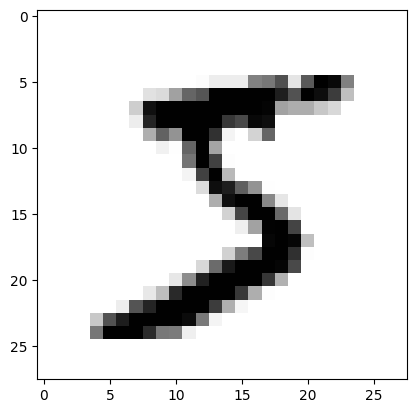

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [9]:
print(y_train[0])

5


It's generally a good idea to "normalize" your data. This typically involves scaling the data to be between 0 and 1, or maybe -1 and positive 1. In our case, each "pixel" is a feature, and each feature currently ranges from 0 to 255. Not quite 0 to 1. Let's change that with a handy utility function:

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

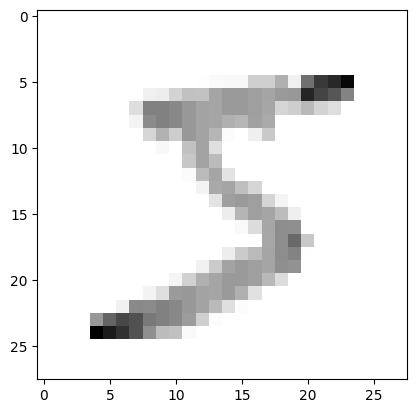

In [12]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

Now let's build our model!

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #This will serve as our input layer.
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  #dense layer 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  #dense layer 2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Output layer


Now we need to "compile" the model. This is where we pass the settings for actually optimizing/training the model we've defined.

A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss.

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Now, we fit!

In [20]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2651 - accuracy: 0.9221
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1092 - accuracy: 0.9662
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0744 - accuracy: 0.9768


Model Evaluation

In [23]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print("Validation_loss", val_loss)
print("Validation_accuracy", val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.9706
Validation_loss 0.09728951752185822
Validation_accuracy 0.9706000089645386


In [25]:
model.save('epic_num_reader.model')

In [26]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [27]:
predictions = new_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [28]:
print(predictions)

[[6.4699977e-12 6.3241576e-09 5.7011248e-06 ... 9.9997526e-01
  3.0828378e-08 3.7433284e-07]
 [1.8996485e-10 1.0065520e-04 9.9988168e-01 ... 2.2373842e-11
  1.5635976e-07 1.8265578e-13]
 [3.2660964e-08 9.9961871e-01 2.0622436e-05 ... 2.2154201e-05
  2.4048446e-04 2.2531822e-06]
 ...
 [3.1823724e-11 3.3560573e-07 1.5479313e-07 ... 7.5269036e-06
  1.6549526e-06 4.7280584e-05]
 [2.0244940e-07 1.6272459e-06 4.8256135e-07 ... 3.7603122e-08
  2.8794743e-03 4.1516142e-08]
 [2.2861202e-06 3.3220991e-07 1.0443695e-05 ... 3.1979300e-10
  2.0917436e-07 3.1233821e-08]]


In [29]:
import numpy as np

print(np.argmax(predictions[0]))

7


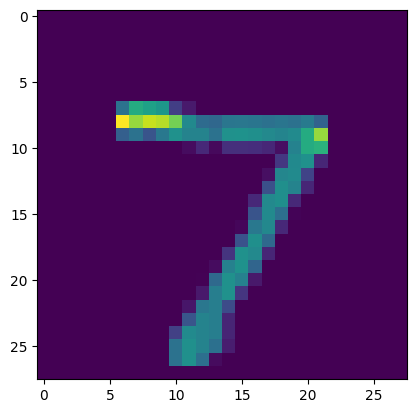

In [30]:
plt.imshow(x_test[0])
plt.show();